# Graph Visualization

By Eddie Xu and Mohamed Hassan-El Serafi

This week's assignment is to:

Load a graph database of your choosing from a text file or other source.  If you take a large network dataset from the web (such as from Stanford Large Network Dataset Collection), please feel free at this point to load just a small subset of the nodes and edges.
Create basic analysis on the graph, including the graph’s diameter, and at least one other metric of your choosing.  You may either code the functions by hand (to build your intuition and insight), or use functions in an existing package. 
Use a visualization tool of your choice (Neo4j, Gephi, etc.) to display information.
Please record a short video (~ 5 minutes), and submit a link to the video in advance of our meet-up.

In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from pylab import rcParams

In [2]:
%matplotlib inline
rcParams['figure.figsize'] = 10, 10

In [ ]:
cols = ["node1", "node2"]
path = 'https://raw.githubusercontent.com/moham6839/Data_620_Web_Analytics/refs/heads/main/Week_3/mammalia-dolphin-social.edges'
higgs_df = pd.read_csv( path, header = None, delimiter=' ' )
higgs_df.columns = cols
print(higgs_df.shape)
higgs_df.head()

(159, 2)


,node1,node2
0,1,41
1,1,11
2,1,46
3,1,49
4,1,18


In [14]:
dolphins = nx.read_edgelist(higgs_df, nodetype=int, 
                                     data=(('weight',int),))

In [ ]:
# convert matrix to list of edges and rename the columns
edges = higgs_df.reset_index()
edges.columns = ["node_1", "node_2", "weight"]

# remove self nodes
edges = edges.loc[edges["node_1"] != edges["node_2"]].copy()

dolphins_2 = nx.from_pandas_edgelist(edges, 'node_1', 'node_2', edge_attr=['weight'])
dolphins_2

In [20]:
G = nx.Graph(dolphins_2)

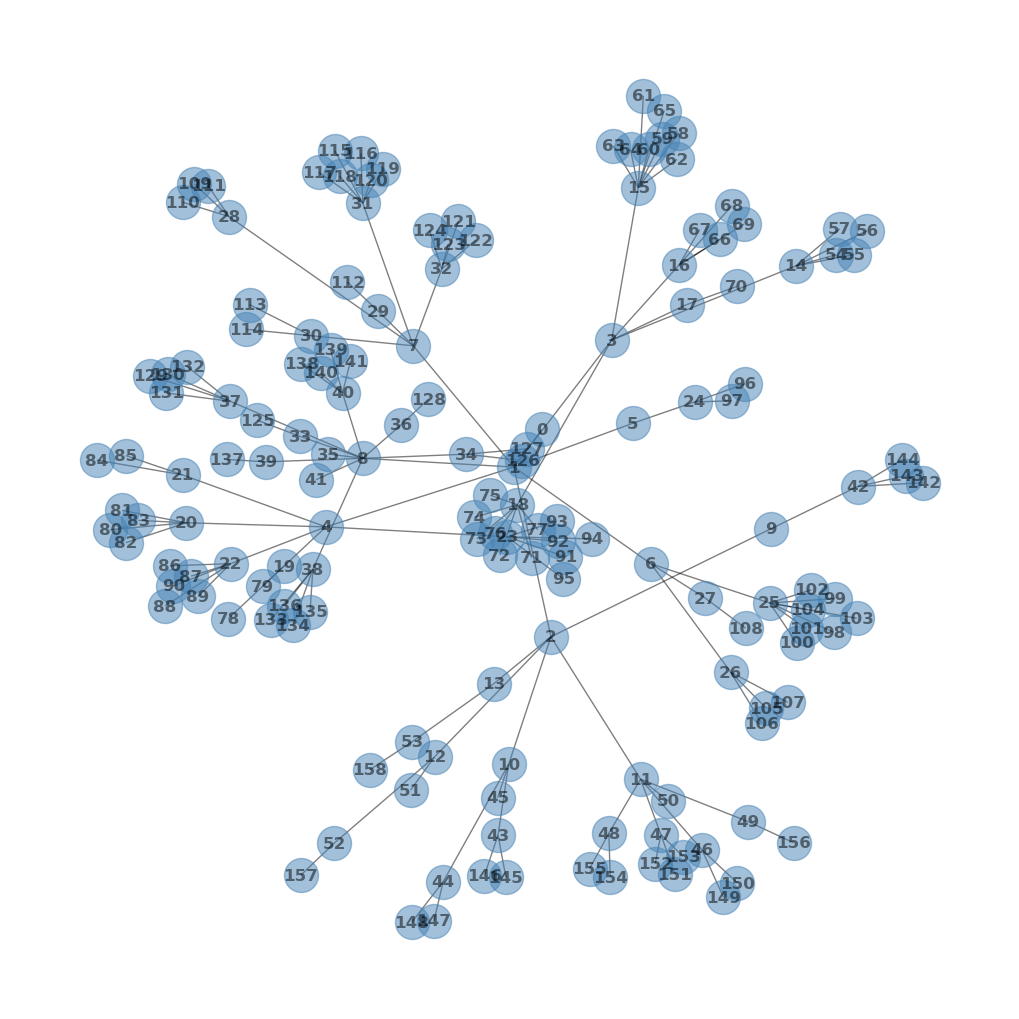

In [22]:
random.seed(42)
nx.draw(dolphins_2, with_labels=True, node_color="steelblue", node_size=600, font_weight='bold', 
        edge_color="black", alpha=0.5)

In [23]:
nx.diameter(G)

7

In [ ]:
# Calculate degree centrality
degree_centrality = nx.degree_centrality(G) 


# Sort by degree centrality in descending order
sorted_degree_centrality = sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True)


# Get top 10 nodes
top_10_nodes = sorted_degree_centrality[:10] 

# print
print(top_10_nodes) 

[(8, 0.06329113924050633), (15, 0.056962025316455694), (1, 0.05063291139240506), (18, 0.05063291139240506), (25, 0.05063291139240506), (31, 0.04430379746835443), (2, 0.0379746835443038), (3, 0.0379746835443038), (4, 0.0379746835443038), (7, 0.0379746835443038)]
